<a href="https://colab.research.google.com/github/AIMosta/All-About-AI-Python-Edition/blob/master/Course%206-%20Unsupervised%20learning/AAA_ped_w5_c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://docs.google.com/uc?export=download&id=1ap18raVTUCSJeGzTLz9kViroFGvTknrV">
# Ensemble Leaning: About Ensemble Learning

>[Supervised Learning: Introduction to Supervised Learning](#scrollTo=b9q-VxEW5tRs)

>[1- Ensemble Learning](#scrollTo=1oBho425Q7ca)

>>[Concept](#scrollTo=yLvtrsm0RcWq)

>>[Voting](#scrollTo=A8DvRRWlRdGi)

>>[Ensemble methods](#scrollTo=OjzIaOe1RdZ2)

>[2- Bagging and Pasting](#scrollTo=VL49qQMiRCfC)

>>[Deffinition](#scrollTo=QtI6YjSJRzo8)

>>[Bagging example using scikit-learn](#scrollTo=Tg2exEipRz7w)

>>[Pasting example using sckit-learn](#scrollTo=lYnbKQUdR0Ou)

>[3- Features sampling](#scrollTo=Nhm8OJc_RFU8)

>>[Definition](#scrollTo=TOgMnI_CR7QE)

>>[Example with a Random patches method](#scrollTo=iJCObGCDR7Wk)

>>[Example with a Random Subspaces method](#scrollTo=Zd06of0ZR7JC)

>[4- Boosting : Adaptive Boosting](#scrollTo=Ca8Ofrs7RHwC)

>>[Boosting](#scrollTo=xn8bZSmqSBwY)

>>[AdaBoost](#scrollTo=157T7zEfSB_u)

>>[SAMME](#scrollTo=ArfuFPFFSB4a)

>>[Example](#scrollTo=zDNBX55A9MWc)

>[5- Boosting: Gradient boosting](#scrollTo=5aXVjrUrRNGi)

>>[Concept](#scrollTo=H71qigLHSGU2)

>>[Example: the data](#scrollTo=Z7prBx0pSGbS)

>>[Example:  using  a GBRT](#scrollTo=rRQa4nSudjXU)

>[6- Stacking or Blending](#scrollTo=CffbTqAERQKg)

>>[Concept](#scrollTo=23ma5K3xSKrS)

>>[Hold-out set: principle](#scrollTo=WIGdB_nfSK9o)

>>[Hold-out set: generalization](#scrollTo=_6H6Ca-GSK4-)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- Ensemble Learning

## Concept
* In** Ensemble Learning**, we **combine** several models to build a **better** model. The **algorithm** used in Ensemble learning is called: an **Ensemble Method**.
* We can combine **classifiers** or **regressors**.
* The models can be all the** same type**,  or** different**. 

## Voting

* Its about: how to select the final prediction.

* In Classification 

  * Hard Voting: 
    * For each sample, a classifier will make a prediction : a class for that sample
    * Select the **most** predicted class by all the classifiers, for that sample .

  * Soft Voting: 
    * available when the classifiers can predict class  probabilities.
    * Select the class with the **highest averaged** probability
* In Regression

  * The **average** of the predicted values.

* These methods are the general way to make the predictions. But, they can differ in some specific Ensemble Method. 

## Ensemble methods
* The ensemble methods can vary by: 
 * **Varying** or not the types of the models: use the **same or different **models.
 * Select the **same sample** only **once** or **several times** in **the same model**.
  * **Whether or not** the model use **all the features** or only a **subset** of features.
 * The models learn in **parallel** or **sequentially**.
 * The type of **mechanism** used to make a** prediction**.

   ## Example

In [0]:
#import iris plant datasets tools
from sklearn.datasets import load_iris

%matplotlib inline

import matplotlib.pyplot as plt


# import numpy
import numpy as np

#import train_test_split from model_selection
from sklearn.model_selection import train_test_split

# import the confusion matrix
from sklearn.metrics import confusion_matrix


In [0]:
# load the data
myIris = load_iris()
X = myIris.data
y = myIris.target
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.25)
print(x_train.shape)

(112, 4)


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logReg = LogisticRegression()
decTree = DecisionTreeClassifier()
SVMClass = SVC()
myEnsembleMethd = VotingClassifier(estimators=[('lr',logReg),('dt',decTree),('svc',SVMClass)]
                                   ,voting='hard')
myEnsembleMethd.fit(x_train, y_train)
y_pred= myEnsembleMethd.predict(x_test.reshape(-1,4))
myConfMat = confusion_matrix(y_test,y_pred)
print( myConfMat)


[[16  0  0]
 [ 0 11  1]
 [ 0  0 10]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 2- Bagging and Pasting

## Deffinition

* **Bagging** (or **Bootstrap aggregating**) and **pasting** are **both** ensemble methods that combine** same type of models**. They both train the **models** on **different random sub sets**. All the models run in **parallel.** They use the **voting** mechanism for the final prediction.

* Both Bagging and Basting apply **random sampling** :
  * The training set of each model is a subset of the original data randomly selected.
  * The same sample can be found in different models (different subsets).
* The difference is:
  * Bagging  : random sampling **with replacement** <==> 
    * One sample can be found **several times** in the **same model** (same subset).
  * Pasting: random sampling **without** replacement <==> 
    * One sample can be found **only once** in the same model (same subset).

## Bagging example using scikit-learn

* We will use an SVC (support vecotr machine classifier) for the bagging example.

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
theModel2 = SVC()
myBagClass2 = BaggingClassifier(
theModel2, n_estimators=300,max_samples=90, bootstrap=True, n_jobs=-1)
myBagClass2.fit(x_train, y_train)
y_pred = myBagClass2.predict(x_test)


myConfMat2 = confusion_matrix(y_test,y_pred)
print( myConfMat2)
myBagClass2.score(x_test,y_test)

[[16  0  0]
 [ 0 11  1]
 [ 0  0 10]]


0.9736842105263158

## Pasting example using sckit-learn

* We will use an SVC (support vecotr machine classifier) for the **bagging **example.

In [0]:
from sklearn.svm import SVC

myBagClass2P = BaggingClassifier(
theModel2, n_estimators=300,max_samples=90, bootstrap=False, n_jobs=-1)
myBagClass2P.fit(x_train, y_train)
y_pred = myBagClass2P.predict(x_test)


myConfMat2P = confusion_matrix(y_test,y_pred)
print( myConfMat2P)
myBagClass2P.score(x_test,y_test)

[[16  0  0]
 [ 0 11  1]
 [ 0  0 10]]


0.9736842105263158

In [0]:
from sklearn.linear_model import LogisticRegression

theModel = LogisticRegression()
myBagClassP = BaggingClassifier(
theModel, n_estimators=300,max_samples=90, bootstrap=False, n_jobs=-1)
myBagClassP.fit(x_train, y_train)
y_pred = myBagClassP.predict(x_test)


myConfMatP = confusion_matrix(y_test,y_pred)
print( myConfMatP)
myBagClassP.score(x_test,y_test)

[[16  0  0]
 [ 0 10  2]
 [ 0  0 10]]


0.9473684210526315

# 3- Features sampling

##  Definition

* All the following methods use **features sampling**: each model will be trained in a **random subset** of features.

* **Sampling features** can be **with **or **without replacement**.


* Random patches method

  * **Sampling **both **“**training instances**” and “**features**”



* Random subspaces method

  * Keeping all **bold text** “**training**” instances but “**sampling” features**

## Example with a Random patches method

In [0]:
 # import the tool for generating the data
from sklearn.datasets import make_regression


# generate a random regression problem
xr,yr= make_regression( n_features = 20)

xr_train,xr_test,yr_train,yr_test= train_test_split(xr, yr, test_size=0.25)
print(xr_train.shape)

(75, 20)


In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression


theModelR = LinearRegression()
myBagReg = BaggingRegressor(
               theModelR, n_estimators=20,max_samples=50,max_features=15, 
               bootstrap=True, bootstrap_features= True, n_jobs=-1)

myBagReg.fit(xr_train, yr_train)
yr_pred = myBagReg.predict(xr_test)
myBagReg.score(xr_test,yr_test)

0.670360383167735

## Example with a Random Subspaces method



In [0]:
myBagReg2 = BaggingRegressor(
               theModelR, n_estimators=45,max_samples=1.0,max_features=1, 
               bootstrap=False, bootstrap_features=False, n_jobs=-1)

myBagReg2.fit(xr_train, yr_train)
yr_pred2 = myBagReg2.predict(xr_test)
myBagReg2.score(xr_test,yr_test)


0.041318141556522796

# 4- Boosting : Adaptive Boosting

## Boosting


* Boosting **bold text** : Ensemble method, that combines **several weak learners** into a** stronger** learner.

* This is done by training the **models sequentially** ==> each model **correct (boost)** its **predecessor**.

* The most known boosting methods are: **Adaptive Boosting** and **Gradient Boosting**.

  * **AdaBoost**: each new predictor focus on the training samples that its **predecessor underfitted **( for example: misclassified in a classification problem) by modifying the instances weight .
  * **Gradient Boosting**: the new predictor tries to** fit**
to the **residual errors** made by the **previous predictor**.



## AdaBoost

* Applicable in binary classification.
* The steps of the algorithm are as follow:
  *  initialize the samples weight $ w^i$ (for the first predictor ) by $\frac{1}{m}$. $m$ is the number of the training samples.
  * for each predictor $j$, after training, and predicting,  compute:
    * the weighted error rate : $r_j = \frac {\sum_{i=1_{y_{true}(i) \ne y_{pred}(i)}}^m  w^i}{\sum_{i=1} ^m w^i}$
    * compute the $j$ predictor's weight:
    $\alpha_j = \eta \log \frac {1 - r_j}{r_j}$. $\eta$ is the learning rate parameter.
    * Compute the new weights (to be used by the following new predictor $j+1$) :
 $ w^i = w^i , if,  y_{true}(i) = y_{pred}(i) $
  $w^i = w^i \exp(\alpha_j),  if, y_{true}(i) \neq y_{pred}(i) $
  
    * Normalize the new weights $ w^i$ by: $w^i=\frac{1}{\sum_{i=1} ^m w^i}$
    * The process is repeated until  the **perfect predictor** is found, or the ** maximum** number of **predictors** is reached.
 * To make a prediction: 
   * make a prediction with each predictor $j$ from the resulting $N$ predictors.
   * attribute a weight to each  prediction by the predictor's  $j$  weight.$\alpha_j$
   * for each sample $x$ select the class $k$ that receives the majority of weighted votes: for each predicted class $k$ sum up the corresponding $\alpha_j$weights, then select the class $k$ with the biggest sum.
    
    
    

## SAMME

* SAMME  : **S**tagewise **A**dditive **M**odeling using a **M**ulti-class **E**xponential loss function

* Enhanced version of **AdaBoost**, applicable in **multiclass** classification.

* Same steps as AdaBoost, just the **$\alpha $** weight is computed differently:  $\alpha_j = \eta *(\log \frac {1 - r_j}{r_j} + log(K-1))$. $K$ is the number of classes.


## Example
* We will apply SAMME algorithm using Scikit Learn on the previous data.
* There is another version of the algorithme **SAMME.R** applicable by default if the model use implements **predict_proba** function.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
  # we will use  a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

theModel4 = DecisionTreeClassifier(max_depth=1)
mySAMME = AdaBoostClassifier(theModel4, n_estimators=200,                           
                           algorithm="SAMME", learning_rate=1
                           )

mySAMME.fit(x_train, y_train)
y_pred = mySAMME.predict(x_test)

myConfMat3 = confusion_matrix(y_test,y_pred)
print(myConfMat3)



[[16  0  0]
 [ 0 11  1]
 [ 0  0 10]]


# 5- Boosting: Gradient boosting

## Concept


1. The predictor will be first trained on a set of data: $x$,$y$
2. The residual errors are computed from its prediction: $r = y - y_{pred}$
3. A new predictor will be trained with the new set of data: $x$,$r$
4. The residual errors are computed again  as follow: $r2 = r - r_{pred}$
5. The steps 3 and 4 are repeated until: you predict using all the predefined number of predictors, or you  determine the optimal consecutive predictors (the least generated error) and you select those predictors as your final model. Or, you continue adding predictors until the errors will not diminish 
6. The final prediction will be the sum of all the predictions.



* Scikit learn implements gradient tree boosting: the models used are decision trees.

## Example: the data

In [0]:
# we will use load_boston utilities to load our data
# we will considere only the feature with the indices 12 (the last one): 'LSTAT'

from sklearn.datasets import load_boston
mydata =load_boston()
xr2 = mydata.data[:,[12]]
yr2 = mydata.target
xr2_train,xr2_test,yr2_train,yr2_test= train_test_split(xr2, yr2, test_size=0.25)






In [0]:
print(mydata.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Example:  using  a GBRT
* **GBRT** for **G**radient **B**oosted **R**egression **T**rees

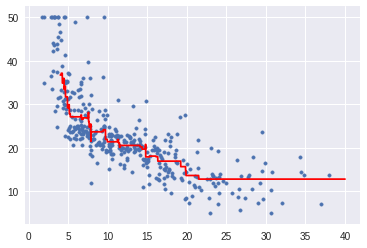

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

myGBRT = GradientBoostingRegressor(max_depth=2, n_estimators=45)
myGBRT.fit(xr2_train, yr2_train)

# xnew to draw the model
xnew= np.linspace(4,40,2000).reshape(-1,1)
ypred= myGBRT.predict(xnew)
plt.plot(xnew, ypred,color="red")
plt.scatter(xr2_train,yr2_train,marker=".")

27.701804841167945


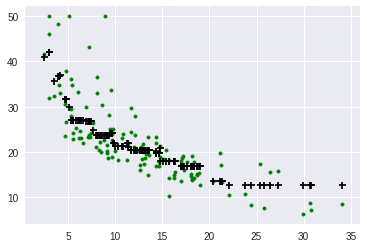

In [0]:
# testing the model
ypred= myGBRT.predict(xr2_test)

#plot the true values: in green and the predicted values: in black
plt.scatter(xr2_test,yr2_test,color="green",marker=".")
plt.scatter(xr2_test,ypred,color="black",marker="+")


from sklearn.metrics import mean_squared_error as MSE
print (MSE(yr2_test,ypred))

# 6- Stacking or Blending

## Concept

* The idea here, is to train a model to** learn** how to** aggregate** the ensemble models predictions.

* The method is composed of:
  * Learner models : that will fit to the data, and make the predictions.
  * **Blender**: the final model  or meta learner, that will make the final prediction.

* There are different methods to train the blender:
  * Hold-out set: Blending
  * Out-of-fold: Stacking

## Hold-out set: principle

* An example using 3 Predictors and 1 blender (2 layers). The 3 predictors will form **a layer** ,  and another predictor will be the **second layer**.

  * First, the training data is subdivided into 2 subsets.
  * The **first subset** is used by the first layer to train.
  * The **trained** layer will use the** second subset**  to predict new values:  3 predictors ==>  3 set of predictions
  * The 3 set of predictions will form a new set of values: each set will represent a feature ==> x values with 3 features.
  * The target values will be the target values of the orginal subsest of the training data (the second one used for prediction) .
  * The new set values will be used by the blender (another model) to train.
 
* To make a prediction with new instances:
  *  The new instance will go through the first layer.
  * The resulting predictions will  serve as input for the second layer.
  * The prediction made by this later one is the final result.



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# predictors composing the first layer
myModel1 = SVR(kernel='poly')
myModel2 = LinearRegression()
myModel3 = DecisionTreeRegressor()

# the model choosen for the blender
myBlender = SVR(kernel='linear')

#subdividing the= training data into 2 subsets
size=  int(xr2_train.shape[0]/2)

subXR1=xr2_train[:size]
subXR2=xr2_train[size:]

subYR1= yr2_train[:size]
subYR2= yr2_train[size:]
print(subXR1.shape,subXR2.shape,subYR1.shape,subYR2.shape)

# training the first layer
myModel1.fit(subXR1,subYR1)
myModel2.fit(subXR1,subYR1)
myModel3.fit(subXR1,subYR1)

# predicting with the second subset

pred1 = myModel1.predict(subXR2)
pred2 = myModel2.predict(subXR2)
pred3 = myModel3.predict(subXR2)


# constructing the new x values
xnew = np.append(pred1.reshape(-1,1), pred2.reshape(-1,1), axis= 1)
xnew= np.append(xnew, pred3.reshape(-1,1),axis = 1)
print(xnew.shape)


# train on the previous predicted values

myBlender.fit(xnew,subYR2)

# predicting on test data

# predicting with the first layer

pred1 = myModel1.predict(xr2_test)
pred2 = myModel2.predict(xr2_test)
pred3 = myModel3.predict(xr2_test)

# create the x vlaues
# constructing the new x values
xnew_test = np.append(pred1.reshape(-1,1), pred2.reshape(-1,1), axis= 1)
xnew_test= np.append(xnew_test, pred3.reshape(-1,1),axis = 1)
print(xnew_test.shape)


# predicting with the second layer
myFP= myBlender.predict(xnew_test)
print(myBlender.score(xnew_test,yr2_test))

# printing the mean square error
print (MSE(yr2_test,myFP))

(189, 1) (190, 1) (189,) (190,)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(190, 3)
(127, 3)
0.6411442145726178
27.90487595475314


## Hold-out set: generalization

* Its possible to train several type of blenders. And , each one can be a set of models.

* The idea is to divide the original training set into several subsets: n subsets ==> n layers (n-1 blending phase)

* The first set of predictors will  train from the first subset, and make prediction with the second one.

* The second set of predictors will train from the previous predictions. And then make new predictions using the third subset.

* The process is repeated until the last subset of predictors: it will train from the last predictions made by the previous predictors using the last subset of data. 

# References

* Aurélien Géron. Hands-on machine learning with Scikit-Learn and Tensor-Flow: concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc, 2017.

* Scikit-learn.org. scikit-learn, machine learning in python. On-line at https://scikit-learn.org/stable/. Accessed on 03-11-2018.